# Assignment Part 1: Load some data you have gathered for your project into Python.

## Background
* This exercise aims to show linear regression between the Fitbit Step Count and the resulting Sleep Duration at the end of the day.

### Step1: Data Acquisition from Fitbit Desktop App
* The data was sourced using the student's Fitbit Steps and Sleep Log over the last 6 months between 1st Sep 2016 and 28 Feb 2017.
* As the Fitbit Data Export facility only allows one month of data to be exported at a time, and the data format exported shows Activity logs on the top block then Sleep Log on the lower block, some manual steps were taken to segregate the data into individual pieces that pandas "read_csv" functionality can import.
* As such, DATA EXPORT from the Fitbit Desktop App was performed six times, one for each month, and these export files had to be divided further into two: Steps and Sleep log, therefore rendering 12 CSV files.

In [1]:
import pandas

### Step2 (Part 1 of 2): Data Preprocessing for Steps Data

In [2]:
# import fitbit activity data over the last six months
feb_steps = pandas.read_csv('C:\Users\Celeste\Desktop\GA Data Science\SYD_DAT_7\HW2_Celeste\Feb2017_Activity.csv')
jan_steps = pandas.read_csv('C:\Users\Celeste\Desktop\GA Data Science\SYD_DAT_7\HW2_Celeste\Jan2017_Activity.csv')
dec_steps = pandas.read_csv('C:\Users\Celeste\Desktop\GA Data Science\SYD_DAT_7\HW2_Celeste\Dec2016_Activity.csv')
nov_steps = pandas.read_csv('C:\Users\Celeste\Desktop\GA Data Science\SYD_DAT_7\HW2_Celeste\Nov2016_Activity.csv')
oct_steps = pandas.read_csv('C:\Users\Celeste\Desktop\GA Data Science\SYD_DAT_7\HW2_Celeste\Oct2016_Activity.csv')
sep_steps = pandas.read_csv('C:\Users\Celeste\Desktop\GA Data Science\SYD_DAT_7\HW2_Celeste\Sep2016_Activity.csv')

In [3]:
sep_steps.dtypes

Date                      object
Calories_Burned            int64
Steps                      int64
Distance                   int64
Floors                     int64
Minutes_Sedentary          int64
Minutes_Lightly_Active     int64
Minutes_Fairly_Active      int64
Minutes_Very_Active        int64
Activity_Calories          int64
dtype: object

In [4]:
#the following six steps are done to inspect the imported "step" data
sep_steps.head(3)

Date  Calories_Burned  Steps  Distance  Floors  Minutes_Sedentary  \
0  1/09/2016             2080  10557         7      30                738   
1  2/09/2016             1640   2274         1       0                894   
2  3/09/2016             2217  13995         9      34                548   

   Minutes_Lightly_Active  Minutes_Fairly_Active  Minutes_Very_Active  \
0                     177                     36                   27   
1                     142                      0                    0   
2                     134                     58                   59   

   Activity_Calories  
0                907  
1                377  
2               1066

In [5]:
oct_steps.head(3)

Date  Calories_Burned  Steps  Distance  Floors  Minutes_Sedentary  \
0  1/10/2016             1968   7818         5      15                735   
1  2/10/2016             1995   7211         5       5                632   
2  3/10/2016             2217  13989         9      63                657   

   Minutes_Lightly_Active  Minutes_Fairly_Active  Minutes_Very_Active  \
0                     243                      8                    4   
1                     288                      6                    4   
2                     125                     27                   84   

   Activity_Calories  
0                812  
1                878  
2               1051

In [6]:
nov_steps.head(3)

Date  Calories_Burned  Steps  Distance  Floors  Minutes_Sedentary  \
0  1/11/2016             2329  15531        10      44                708   
1  2/11/2016             2190  13082         8      30                809   
2  3/11/2016             1931   8017         5      18                848   

   Minutes_Lightly_Active  Minutes_Fairly_Active  Minutes_Very_Active  \
0                     219                     24                   42   
1                     181                     19                   51   
2                     176                      8                   13   

   Activity_Calories  
0               1200  
1               1026  
2                713

In [7]:
dec_steps.head(3)

Date  Calories_Burned  Steps  Distance  Floors  Minutes_Sedentary  \
0  1/12/2016             2100  11021         7      14                651   
1  2/12/2016             2072  10000         6      23                779   
2  3/12/2016             1981   6135         4       2                754   

   Minutes_Lightly_Active  Minutes_Fairly_Active  Minutes_Very_Active  \
0                     200                     17                   22   
1                     209                     17                   24   
2                     315                      0                    0   

   Activity_Calories  
0                921  
1                904  
2                880

In [8]:
jan_steps.head(3)

Date  Calories_Burned  Steps  Distance  Floors  Minutes_Sedentary  \
0  1/01/2017             2144  11623         7       4                724   
1  2/01/2017             1405    348         0       0                890   
2  3/01/2017             2074   9217         6      14               1047   

   Minutes_Lightly_Active  Minutes_Fairly_Active  Minutes_Very_Active  \
0                     201                     45                   30   
1                      16                      0                    0   
2                     280                     11                   12   

   Activity_Calories  
0               1008  
1                 45  
2                968

In [9]:
feb_steps.head(3)

Date  Calories_Burned  Steps  Distance  Floors  Minutes_Sedentary  \
0  1/02/2017             2027   9703         6      23                713   
1  2/02/2017             2356  16241        10      50                818   
2  3/02/2017             2202  13105         8      15                636   

   Minutes_Lightly_Active  Minutes_Fairly_Active  Minutes_Very_Active  \
0                     154                     16                   40   
1                     160                     16                   82   
2                     198                     31                   33   

   Activity_Calories  
0                821  
1               1197  
2               1050

In [10]:
# merge all the Steps data into one data frame
# append sep, oct, ...feb data
steps = sep_steps.append(oct_steps)
steps = steps.append(nov_steps)
steps = steps.append(dec_steps)
steps = steps.append(jan_steps)
steps = steps.append(feb_steps)
steps


Date  Calories_Burned  Steps  Distance  Floors  Minutes_Sedentary  \
0    1/09/2016             2080  10557         7      30                738   
1    2/09/2016             1640   2274         1       0                894   
2    3/09/2016             2217  13995         9      34                548   
3    4/09/2016             2314  15180        10      36                605   
4    5/09/2016             2174  12352         8      25                857   
5    6/09/2016             2174  12458         8      28                836   
6    7/09/2016             2392  16574        11      29                782   
7    8/09/2016             2205  13487         9      36                607   
8    9/09/2016             2127  11333         7      24                812   
9   10/09/2016             1886   7543         5      11                914   
10  11/09/2016             2133  11644         7      18                813   
11  12/09/2016             2010   9768         6      28                724   
12  13/09/2016             2058  10579         7      19                911   
13  14/09/2016             2152  12212         8      37                803   
14  15/09/2016             2464  17521        11      50                696   
15  16/09/2016             2354  16307        10      30                747   
16  17/09/2016             1868   6270         4      18                718   
17  18/09/2016             1873   7673         5      14                590   
18  19/09/2016             1920   7869         5      24                715   
19  20/09/2016             2490  18283        12      37                721   
20  21/09/2016             2013   9483         6      23                756   
21  22/09/2016             2078   9807         6      23                743   
22  23/09/2016             2308  15332        10      33                796   
23  24/09/2016             2172  11030         7      18               1130   
24  25/09/2016             2165  11054         7       3                666   
25  26/09/2016             2119  11804         8      21                684   
26  27/09/2016             2125  11229         7      31                711   
27  28/09/2016             2306  15029        10      25                777   
28  29/09/2016             1804   5551         4      12                659   
29  30/09/2016             2390  16322        10      33                744   
..         ...              ...    ...       ...     ...                ...   
29  30/01/2017             2186  13108         8      37                791   
30  31/01/2017             2131  11464         7      29                795   
0    1/02/2017             2027   9703         6      23                713   
1    2/02/2017             2356  16241        10      50                818   
2    3/02/2017             2202  13105         8      15                636   
3    4/02/2017             2003   8847         6      18               1199   
4    5/02/2017             1969   7327         5      12                713   
5    6/02/2017             1972   8429         5      14                862   
6    7/02/2017             2040   9399         6      23                861   
7    8/02/2017             2281  14149         9      37                847   
8    9/02/2017             2135  11965         8      21                853   
9   10/02/2017             2070   9923         6      38                843   
10  11/02/2017             2133  10156         7      10                733   
11  12/02/2017             1670   2691         2       9                801   
12  13/02/2017             2340  15479        10      42                765   
13  14/02/2017             1984   8808         6      18                829   
14  15/02/2017             2144  12009         8      36                726   
15  16/02/2017             2153  12057         8      24                830   
16  17/02/2017             2112  11496         7      29    

In [11]:
steps.dtypes

Date                      object
Calories_Burned            int64
Steps                      int64
Distance                   int64
Floors                     int64
Minutes_Sedentary          int64
Minutes_Lightly_Active     int64
Minutes_Fairly_Active      int64
Minutes_Very_Active        int64
Activity_Calories          int64
dtype: object

In [12]:
# get rid of rows with NaN data
steps=steps.dropna()
steps

Date  Calories_Burned  Steps  Distance  Floors  Minutes_Sedentary  \
0    1/09/2016             2080  10557         7      30                738   
1    2/09/2016             1640   2274         1       0                894   
2    3/09/2016             2217  13995         9      34                548   
3    4/09/2016             2314  15180        10      36                605   
4    5/09/2016             2174  12352         8      25                857   
5    6/09/2016             2174  12458         8      28                836   
6    7/09/2016             2392  16574        11      29                782   
7    8/09/2016             2205  13487         9      36                607   
8    9/09/2016             2127  11333         7      24                812   
9   10/09/2016             1886   7543         5      11                914   
10  11/09/2016             2133  11644         7      18                813   
11  12/09/2016             2010   9768         6      28                724   
12  13/09/2016             2058  10579         7      19                911   
13  14/09/2016             2152  12212         8      37                803   
14  15/09/2016             2464  17521        11      50                696   
15  16/09/2016             2354  16307        10      30                747   
16  17/09/2016             1868   6270         4      18                718   
17  18/09/2016             1873   7673         5      14                590   
18  19/09/2016             1920   7869         5      24                715   
19  20/09/2016             2490  18283        12      37                721   
20  21/09/2016             2013   9483         6      23                756   
21  22/09/2016             2078   9807         6      23                743   
22  23/09/2016             2308  15332        10      33                796   
23  24/09/2016             2172  11030         7      18               1130   
24  25/09/2016             2165  11054         7       3                666   
25  26/09/2016             2119  11804         8      21                684   
26  27/09/2016             2125  11229         7      31                711   
27  28/09/2016             2306  15029        10      25                777   
28  29/09/2016             1804   5551         4      12                659   
29  30/09/2016             2390  16322        10      33                744   
..         ...              ...    ...       ...     ...                ...   
29  30/01/2017             2186  13108         8      37                791   
30  31/01/2017             2131  11464         7      29                795   
0    1/02/2017             2027   9703         6      23                713   
1    2/02/2017             2356  16241        10      50                818   
2    3/02/2017             2202  13105         8      15                636   
3    4/02/2017             2003   8847         6      18               1199   
4    5/02/2017             1969   7327         5      12                713   
5    6/02/2017             1972   8429         5      14                862   
6    7/02/2017             2040   9399         6      23                861   
7    8/02/2017             2281  14149         9      37                847   
8    9/02/2017             2135  11965         8      21                853   
9   10/02/2017             2070   9923         6      38                843   
10  11/02/2017             2133  10156         7      10                733   
11  12/02/2017             1670   2691         2       9                801   
12  13/02/2017             2340  15479        10      42                765   
13  14/02/2017             1984   8808         6      18                829   
14  15/02/2017             2144  12009         8      36                726   
15  16/02/2017             2153  12057         8      24                830   
16  17/02/2017             2112  11496         7      29    

In [13]:
# reset the index to ensure it is correct for the new combined dataset: "steps2"
steps2=steps.reset_index()
steps2

index        Date  Calories_Burned  Steps  Distance  Floors  \
0        0   1/09/2016             2080  10557         7      30   
1        1   2/09/2016             1640   2274         1       0   
2        2   3/09/2016             2217  13995         9      34   
3        3   4/09/2016             2314  15180        10      36   
4        4   5/09/2016             2174  12352         8      25   
5        5   6/09/2016             2174  12458         8      28   
6        6   7/09/2016             2392  16574        11      29   
7        7   8/09/2016             2205  13487         9      36   
8        8   9/09/2016             2127  11333         7      24   
9        9  10/09/2016             1886   7543         5      11   
10      10  11/09/2016             2133  11644         7      18   
11      11  12/09/2016             2010   9768         6      28   
12      12  13/09/2016             2058  10579         7      19   
13      13  14/09/2016             2152  12212         8      37   
14      14  15/09/2016             2464  17521        11      50   
15      15  16/09/2016             2354  16307        10      30   
16      16  17/09/2016             1868   6270         4      18   
17      17  18/09/2016             1873   7673         5      14   
18      18  19/09/2016             1920   7869         5      24   
19      19  20/09/2016             2490  18283        12      37   
20      20  21/09/2016             2013   9483         6      23   
21      21  22/09/2016             2078   9807         6      23   
22      22  23/09/2016             2308  15332        10      33   
23      23  24/09/2016             2172  11030         7      18   
24      24  25/09/2016             2165  11054         7       3   
25      25  26/09/2016             2119  11804         8      21   
26      26  27/09/2016             2125  11229         7      31   
27      27  28/09/2016             2306  15029        10      25   
28      28  29/09/2016             1804   5551         4      12   
29      29  30/09/2016             2390  16322        10      33   
..     ...         ...              ...    ...       ...     ...   
151     29  30/01/2017             2186  13108         8      37   
152     30  31/01/2017             2131  11464         7      29   
153      0   1/02/2017             2027   9703         6      23   
154      1   2/02/2017             2356  16241        10      50   
155      2   3/02/2017             2202  13105         8      15   
156      3   4/02/2017             2003   8847         6      18   
157      4   5/02/2017             1969   7327         5      12   
158      5   6/02/2017             1972   8429         5      14   
159      6   7/02/2017             2040   9399         6      23   
160      7   8/02/2017             2281  14149         9      37   
161      8   9/02/2017             2135  11965         8      21   
162      9  10/02/2017             2070   9923         6      38   
163     10  11/02/2017             2133  10156         7      10   
164     11  12/02/2017             1670   2691         2       9   
165     12  13/02/2017             2340  15479        10      42   
166     13  14/02/2017             1984   8808         6      18   
167     14  15/02/2017             2144  12009         8      36   
168     15  16/02/2017             2153  12057         8      24   
169     16  17/02/2017             2112  11496         7      29   
170     17  18/02/2017             1896   6542         4      10   
171     18  19/02/2017             1815   4915         3       8   
172     19  20/02/2017             2152  12775         8      38   
173     20  21/02/2017             2000   9646         6      26   
174     21  22/02/2017             2174  13026         8      38   
175     22  23/02/2017             1976  10417         7      42   
176     23  24/02/2017             2249  14895        10       0   
177     24  25/02/2017             1981   8578         5     

In [14]:
#check step2s data types
steps2.dtypes

index                      int64
Date                      object
Calories_Burned            int64
Steps                      int64
Distance                   int64
Floors                     int64
Minutes_Sedentary          int64
Minutes_Lightly_Active     int64
Minutes_Fairly_Active      int64
Minutes_Very_Active        int64
Activity_Calories          int64
dtype: object

In [15]:
# Since step2s' Date column is of object data type, we need to convert it to datetime to allow datetime operation
from datetime import timedelta
import datetime

In [16]:
# convert steps Date column to datetime type
steps2['Date'] = pandas.to_datetime(steps2['Date'])
steps2

index       Date  Calories_Burned  Steps  Distance  Floors  \
0        0 2016-01-09             2080  10557         7      30   
1        1 2016-02-09             1640   2274         1       0   
2        2 2016-03-09             2217  13995         9      34   
3        3 2016-04-09             2314  15180        10      36   
4        4 2016-05-09             2174  12352         8      25   
5        5 2016-06-09             2174  12458         8      28   
6        6 2016-07-09             2392  16574        11      29   
7        7 2016-08-09             2205  13487         9      36   
8        8 2016-09-09             2127  11333         7      24   
9        9 2016-10-09             1886   7543         5      11   
10      10 2016-11-09             2133  11644         7      18   
11      11 2016-12-09             2010   9768         6      28   
12      12 2016-09-13             2058  10579         7      19   
13      13 2016-09-14             2152  12212         8      37   
14      14 2016-09-15             2464  17521        11      50   
15      15 2016-09-16             2354  16307        10      30   
16      16 2016-09-17             1868   6270         4      18   
17      17 2016-09-18             1873   7673         5      14   
18      18 2016-09-19             1920   7869         5      24   
19      19 2016-09-20             2490  18283        12      37   
20      20 2016-09-21             2013   9483         6      23   
21      21 2016-09-22             2078   9807         6      23   
22      22 2016-09-23             2308  15332        10      33   
23      23 2016-09-24             2172  11030         7      18   
24      24 2016-09-25             2165  11054         7       3   
25      25 2016-09-26             2119  11804         8      21   
26      26 2016-09-27             2125  11229         7      31   
27      27 2016-09-28             2306  15029        10      25   
28      28 2016-09-29             1804   5551         4      12   
29      29 2016-09-30             2390  16322        10      33   
..     ...        ...              ...    ...       ...     ...   
151     29 2017-01-30             2186  13108         8      37   
152     30 2017-01-31             2131  11464         7      29   
153      0 2017-01-02             2027   9703         6      23   
154      1 2017-02-02             2356  16241        10      50   
155      2 2017-03-02             2202  13105         8      15   
156      3 2017-04-02             2003   8847         6      18   
157      4 2017-05-02             1969   7327         5      12   
158      5 2017-06-02             1972   8429         5      14   
159      6 2017-07-02             2040   9399         6      23   
160      7 2017-08-02             2281  14149         9      37   
161      8 2017-09-02             2135  11965         8      21   
162      9 2017-10-02             2070   9923         6      38   
163     10 2017-11-02             2133  10156         7      10   
164     11 2017-12-02             1670   2691         2       9   
165     12 2017-02-13             2340  15479        10      42   
166     13 2017-02-14             1984   8808         6      18   
167     14 2017-02-15             2144  12009         8      36   
168     15 2017-02-16             2153  12057         8      24   
169     16 2017-02-17             2112  11496         7      29   
170     17 2017-02-18             1896   6542         4      10   
171     18 2017-02-19             1815   4915         3       8   
172     19 2017-02-20             2152  12775         8      38   
173     20 2017-02-21             2000   9646         6      26   
174     21 2017-02-22             2174  13026         8      38   
175     22 2017-02-23             1976  10417         7      42   
176     23 2017-02-24             2249  14895        10       0   
177     24 2017-02-25             1981   8578         5       0   
178     25 2017-02-26             1714   4426       

In [17]:
steps2.dtypes

index                              int64
Date                      datetime64[ns]
Calories_Burned                    int64
Steps                              int64
Distance                           int64
Floors                             int64
Minutes_Sedentary                  int64
Minutes_Lightly_Active             int64
Minutes_Fairly_Active              int64
Minutes_Very_Active                int64
Activity_Calories                  int64
dtype: object

### Step2 (Part 2 of 2): Data Preprocessing for Sleep Data
* Repeat key steps above for the sleep data.

In [18]:
#import fitbit Sleep data over the last six months
# the six input CSV files have been manually combined outside of Python due to consistency issues.
sleep = pandas.read_csv('C:\Users\Celeste\Desktop\GA Data Science\SYD_DAT_7\HW2_Celeste\Sleep.csv')
sleep

Date  Minutes_Asleep  Minutes_Awake  Number_of_Awakenings  \
0     1/09/2016             192            278                     3   
1     2/09/2016             304            140                     1   
2     3/09/2016             281            318                     3   
3     4/09/2016             172            338                     2   
4     5/09/2016             194            112                     1   
5     6/09/2016             163            125                     2   
6     7/09/2016             175            154                     1   
7     8/09/2016             218            242                     2   
8     9/09/2016             246            255                     3   
9    10/09/2016             153            144                     3   
10   11/09/2016             237            110                     2   
11   12/09/2016             112            273                     0   
12   13/09/2016             188            208                     1   
13   14/09/2016             183            180                     2   
14   15/09/2016             175            165                     3   
15   16/09/2016             199            257                     1   
16   17/09/2016             136            309                     8   
17   18/09/2016             262            408                     4   
18   19/09/2016             237            154                     2   
19   20/09/2016             176            234                     1   
20   21/09/2016             206            205                     1   
21   22/09/2016             127            212                     2   
22   23/09/2016             190            144                     0   
23   24/09/2016               0              0                     0   
24   25/09/2016             176            126                     1   
25   26/09/2016             210            261                     1   
26   27/09/2016             198            255                     1   
27   28/09/2016             124            320                     1   
28   29/09/2016             164            207                     2   
29   30/09/2016             184            277                     1   
..          ...             ...            ...                   ...   
151  30/01/2017             218            129                     1   
152  31/01/2017             208            231                     2   
153   1/02/2017             213            145                     1   
154   2/02/2017             239            230                     3   
155   3/02/2017             232            142                     1   
156   4/02/2017               0              0                     0   
157   5/02/2017             288            169                     3   
158   6/02/2017             129            164                     1   
159   7/02/2017             237            154                     1   
160   8/02/2017             159            104                     2   
161   9/02/2017             229            167                     0   
162  10/02/2017             202             75                     1   
163  11/02/2017             264            110                     2   
164  12/02/2017             296            149                     1   
165  13/02/2017             168            193                     2   
166  14/02/2017             297             71                     1   
167  15/02/2017             208            205                     3   
168  16/02/2017             226            230                     0   
169  17/02/2017             202            166                     2   
170  18/02/2017               0              0                     0   
171  19/02/2017             273            197                     2   
172  20/02/2017               0              0                     0   
173  21/02/2017             211            206                     2   
174  22/02/2017             192            110     

In [19]:
#check sleep's data types
sleep.dtypes

Date                    object
Minutes_Asleep           int64
Minutes_Awake            int64
Number_of_Awakenings     int64
Time_in_Bed              int64
dtype: object

In [20]:
# convert sleep Date column to datetime type
sleep['Date'] = pandas.to_datetime(sleep['Date'])
sleep

Date  Minutes_Asleep  Minutes_Awake  Number_of_Awakenings  \
0   2016-01-09             192            278                     3   
1   2016-02-09             304            140                     1   
2   2016-03-09             281            318                     3   
3   2016-04-09             172            338                     2   
4   2016-05-09             194            112                     1   
5   2016-06-09             163            125                     2   
6   2016-07-09             175            154                     1   
7   2016-08-09             218            242                     2   
8   2016-09-09             246            255                     3   
9   2016-10-09             153            144                     3   
10  2016-11-09             237            110                     2   
11  2016-12-09             112            273                     0   
12  2016-09-13             188            208                     1   
13  2016-09-14             183            180                     2   
14  2016-09-15             175            165                     3   
15  2016-09-16             199            257                     1   
16  2016-09-17             136            309                     8   
17  2016-09-18             262            408                     4   
18  2016-09-19             237            154                     2   
19  2016-09-20             176            234                     1   
20  2016-09-21             206            205                     1   
21  2016-09-22             127            212                     2   
22  2016-09-23             190            144                     0   
23  2016-09-24               0              0                     0   
24  2016-09-25             176            126                     1   
25  2016-09-26             210            261                     1   
26  2016-09-27             198            255                     1   
27  2016-09-28             124            320                     1   
28  2016-09-29             164            207                     2   
29  2016-09-30             184            277                     1   
..         ...             ...            ...                   ...   
151 2017-01-30             218            129                     1   
152 2017-01-31             208            231                     2   
153 2017-01-02             213            145                     1   
154 2017-02-02             239            230                     3   
155 2017-03-02             232            142                     1   
156 2017-04-02               0              0                     0   
157 2017-05-02             288            169                     3   
158 2017-06-02             129            164                     1   
159 2017-07-02             237            154                     1   
160 2017-08-02             159            104                     2   
161 2017-09-02             229            167                     0   
162 2017-10-02             202             75                     1   
163 2017-11-02             264            110                     2   
164 2017-12-02             296            149                     1   
165 2017-02-13             168            193                     2   
166 2017-02-14             297             71                     1   
167 2017-02-15             208            205                     3   
168 2017-02-16             226            230                     0   
169 2017-02-17             202            166                     2   
170 2017-02-18               0              0                     0   
171 2017-02-19             273            197                     2   
172 2017-02-20               0              0                     0   
173 2017-02-21             211            206                     2   
174 2017-02-22             192            110                     2   
175 2017-02-23             190    

In [21]:
#to verify that the Date field now carries the right data type "DateTime"
sleep.dtypes

Date                    datetime64[ns]
Minutes_Asleep                   int64
Minutes_Awake                    int64
Number_of_Awakenings             int64
Time_in_Bed                      int64
dtype: object

### Part 3: Learn

* A previous data analysis reveals that :
    * a. the Fitbit sleep Date field reflects the date when one gets up.
    * b. the Fitbit steps Date field reflects the data when the actual steps were made.
    
* This exercise aims to show that step counts affects the sleep duration, therefore for sleep dated 1st Feb, we aim to check if steps dated 31st Jan has influence; Or to use this comparison, join the two data sets on: step date +1 = sleep date

In [22]:
# Implementing this business rule on the data:
steps2['Date_plusOne'] = steps2['Date'] + datetime.timedelta(days=1)
steps2


index       Date  Calories_Burned  Steps  Distance  Floors  \
0        0 2016-01-09             2080  10557         7      30   
1        1 2016-02-09             1640   2274         1       0   
2        2 2016-03-09             2217  13995         9      34   
3        3 2016-04-09             2314  15180        10      36   
4        4 2016-05-09             2174  12352         8      25   
5        5 2016-06-09             2174  12458         8      28   
6        6 2016-07-09             2392  16574        11      29   
7        7 2016-08-09             2205  13487         9      36   
8        8 2016-09-09             2127  11333         7      24   
9        9 2016-10-09             1886   7543         5      11   
10      10 2016-11-09             2133  11644         7      18   
11      11 2016-12-09             2010   9768         6      28   
12      12 2016-09-13             2058  10579         7      19   
13      13 2016-09-14             2152  12212         8      37   
14      14 2016-09-15             2464  17521        11      50   
15      15 2016-09-16             2354  16307        10      30   
16      16 2016-09-17             1868   6270         4      18   
17      17 2016-09-18             1873   7673         5      14   
18      18 2016-09-19             1920   7869         5      24   
19      19 2016-09-20             2490  18283        12      37   
20      20 2016-09-21             2013   9483         6      23   
21      21 2016-09-22             2078   9807         6      23   
22      22 2016-09-23             2308  15332        10      33   
23      23 2016-09-24             2172  11030         7      18   
24      24 2016-09-25             2165  11054         7       3   
25      25 2016-09-26             2119  11804         8      21   
26      26 2016-09-27             2125  11229         7      31   
27      27 2016-09-28             2306  15029        10      25   
28      28 2016-09-29             1804   5551         4      12   
29      29 2016-09-30             2390  16322        10      33   
..     ...        ...              ...    ...       ...     ...   
151     29 2017-01-30             2186  13108         8      37   
152     30 2017-01-31             2131  11464         7      29   
153      0 2017-01-02             2027   9703         6      23   
154      1 2017-02-02             2356  16241        10      50   
155      2 2017-03-02             2202  13105         8      15   
156      3 2017-04-02             2003   8847         6      18   
157      4 2017-05-02             1969   7327         5      12   
158      5 2017-06-02             1972   8429         5      14   
159      6 2017-07-02             2040   9399         6      23   
160      7 2017-08-02             2281  14149         9      37   
161      8 2017-09-02             2135  11965         8      21   
162      9 2017-10-02             2070   9923         6      38   
163     10 2017-11-02             2133  10156         7      10   
164     11 2017-12-02             1670   2691         2       9   
165     12 2017-02-13             2340  15479        10      42   
166     13 2017-02-14             1984   8808         6      18   
167     14 2017-02-15             2144  12009         8      36   
168     15 2017-02-16             2153  12057         8      24   
169     16 2017-02-17             2112  11496         7      29   
170     17 2017-02-18             1896   6542         4      10   
171     18 2017-02-19             1815   4915         3       8   
172     19 2017-02-20             2152  12775         8      38   
173     20 2017-02-21             2000   9646         6      26   
174     21 2017-02-22             2174  13026         8      38   
175     22 2017-02-23             1976  10417         7      42   
176     23 2017-02-24             2249  14895        10       0   
177     24 2017-02-25             1981   8578         5       0   
178     25 2017-02-26             1714   4426       

#### Observations worth noting: From the resulting data frame above, the Date and the Date_plusOne field both seem to have some confused formatting rendering :
* Lines 0 to 11 Date_plusOne: Shows as though we added one month (not one day); and 
* Lines 12 and 180: Show the correct results

#### As a resolution, we have two options:
    * a. Get rid of the first 12 rows, where the Dat_plusOne values are incorrect; OR
    * b. Use the Index_col to join the two data sets to not get rid of 12 rows of data.

In [23]:
# trying Resolution Option "a"
steps2 = steps2[steps2.index > 11]
steps2

index       Date  Calories_Burned  Steps  Distance  Floors  \
12      12 2016-09-13             2058  10579         7      19   
13      13 2016-09-14             2152  12212         8      37   
14      14 2016-09-15             2464  17521        11      50   
15      15 2016-09-16             2354  16307        10      30   
16      16 2016-09-17             1868   6270         4      18   
17      17 2016-09-18             1873   7673         5      14   
18      18 2016-09-19             1920   7869         5      24   
19      19 2016-09-20             2490  18283        12      37   
20      20 2016-09-21             2013   9483         6      23   
21      21 2016-09-22             2078   9807         6      23   
22      22 2016-09-23             2308  15332        10      33   
23      23 2016-09-24             2172  11030         7      18   
24      24 2016-09-25             2165  11054         7       3   
25      25 2016-09-26             2119  11804         8      21   
26      26 2016-09-27             2125  11229         7      31   
27      27 2016-09-28             2306  15029        10      25   
28      28 2016-09-29             1804   5551         4      12   
29      29 2016-09-30             2390  16322        10      33   
30       0 2016-01-10             1968   7818         5      15   
31       1 2016-02-10             1995   7211         5       5   
32       2 2016-03-10             2217  13989         9      63   
33       3 2016-04-10             2144  12166         8      27   
34       4 2016-05-10             2244  14426         9      22   
35       5 2016-06-10             2147  11790         8      35   
36       6 2016-07-10             2595  21097        14      32   
37       7 2016-08-10             2065   8243         5       3   
38       8 2016-09-10             2328  13912         9      58   
39       9 2016-10-10             2216  13498         9      38   
40      10 2016-11-10             2174  12622         8      23   
41      11 2016-12-10             2226  13709         9      20   
..     ...        ...              ...    ...       ...     ...   
151     29 2017-01-30             2186  13108         8      37   
152     30 2017-01-31             2131  11464         7      29   
153      0 2017-01-02             2027   9703         6      23   
154      1 2017-02-02             2356  16241        10      50   
155      2 2017-03-02             2202  13105         8      15   
156      3 2017-04-02             2003   8847         6      18   
157      4 2017-05-02             1969   7327         5      12   
158      5 2017-06-02             1972   8429         5      14   
159      6 2017-07-02             2040   9399         6      23   
160      7 2017-08-02             2281  14149         9      37   
161      8 2017-09-02             2135  11965         8      21   
162      9 2017-10-02             2070   9923         6      38   
163     10 2017-11-02             2133  10156         7      10   
164     11 2017-12-02             1670   2691         2       9   
165     12 2017-02-13             2340  15479        10      42   
166     13 2017-02-14             1984   8808         6      18   
167     14 2017-02-15             2144  12009         8      36   
168     15 2017-02-16             2153  12057         8      24   
169     16 2017-02-17             2112  11496         7      29   
170     17 2017-02-18             1896   6542         4      10   
171     18 2017-02-19             1815   4915         3       8   
172     19 2017-02-20             2152  12775         8      38   
173     20 2017-02-21             2000   9646         6      26   
174     21 2017-02-22             2174  13026         8      38   
175     22 2017-02-23             1976  10417         7      42   
176     23 2017-02-24             2249  14895        10       0   
177     24 2017-02-25             1981   8578         5       0   
178     25 2017-02-26             1714   4426       

In [24]:
#sleep data frame appears to have the same problem so:
sleep2 = sleep[sleep.index > 11]
sleep2

Date  Minutes_Asleep  Minutes_Awake  Number_of_Awakenings  \
12  2016-09-13             188            208                     1   
13  2016-09-14             183            180                     2   
14  2016-09-15             175            165                     3   
15  2016-09-16             199            257                     1   
16  2016-09-17             136            309                     8   
17  2016-09-18             262            408                     4   
18  2016-09-19             237            154                     2   
19  2016-09-20             176            234                     1   
20  2016-09-21             206            205                     1   
21  2016-09-22             127            212                     2   
22  2016-09-23             190            144                     0   
23  2016-09-24               0              0                     0   
24  2016-09-25             176            126                     1   
25  2016-09-26             210            261                     1   
26  2016-09-27             198            255                     1   
27  2016-09-28             124            320                     1   
28  2016-09-29             164            207                     2   
29  2016-09-30             184            277                     1   
30  2016-01-10             224            196                     1   
31  2016-02-10             243            341                     4   
32  2016-03-10             154            375                     2   
33  2016-04-10             159            209                     2   
34  2016-05-10               0              0                     3   
35  2016-06-10             165            185                     1   
36  2016-07-10             247            112                     1   
37  2016-08-10             165            192                     1   
38  2016-09-10             255            228                     3   
39  2016-10-10             255            133                     2   
40  2016-11-10             181            196                     1   
41  2016-12-10             162            208                     1   
..         ...             ...            ...                   ...   
151 2017-01-30             218            129                     1   
152 2017-01-31             208            231                     2   
153 2017-01-02             213            145                     1   
154 2017-02-02             239            230                     3   
155 2017-03-02             232            142                     1   
156 2017-04-02               0              0                     0   
157 2017-05-02             288            169                     3   
158 2017-06-02             129            164                     1   
159 2017-07-02             237            154                     1   
160 2017-08-02             159            104                     2   
161 2017-09-02             229            167                     0   
162 2017-10-02             202             75                     1   
163 2017-11-02             264            110                     2   
164 2017-12-02             296            149                     1   
165 2017-02-13             168            193                     2   
166 2017-02-14             297             71                     1   
167 2017-02-15             208            205                     3   
168 2017-02-16             226            230                     0   
169 2017-02-17             202            166                     2   
170 2017-02-18               0              0                     0   
171 2017-02-19             273            197                     2   
172 2017-02-20               0              0                     0   
173 2017-02-21             211            206                     2   
174 2017-02-22             192            110                     2   
175 2017-02-23             190    

In [25]:
# Joining the two data frames to ensure that the rows align where steps2's date + 1 equals sleep2's date
steps_and_sleep = steps2.merge(sleep2, left_on='Date_plusOne', right_on='Date',  how='inner')
steps_and_sleep

index     Date_x  Calories_Burned  Steps  Distance  Floors  \
0       12 2016-09-13             2058  10579         7      19   
1       13 2016-09-14             2152  12212         8      37   
2       14 2016-09-15             2464  17521        11      50   
3       15 2016-09-16             2354  16307        10      30   
4       16 2016-09-17             1868   6270         4      18   
5       17 2016-09-18             1873   7673         5      14   
6       18 2016-09-19             1920   7869         5      24   
7       19 2016-09-20             2490  18283        12      37   
8       20 2016-09-21             2013   9483         6      23   
9       21 2016-09-22             2078   9807         6      23   
10      22 2016-09-23             2308  15332        10      33   
11      23 2016-09-24             2172  11030         7      18   
12      24 2016-09-25             2165  11054         7       3   
13      25 2016-09-26             2119  11804         8      21   
14      26 2016-09-27             2125  11229         7      31   
15      27 2016-09-28             2306  15029        10      25   
16      28 2016-09-29             1804   5551         4      12   
17       0 2016-01-10             1968   7818         5      15   
18       1 2016-02-10             1995   7211         5       5   
19       2 2016-03-10             2217  13989         9      63   
20       3 2016-04-10             2144  12166         8      27   
21       4 2016-05-10             2244  14426         9      22   
22       5 2016-06-10             2147  11790         8      35   
23       6 2016-07-10             2595  21097        14      32   
24       7 2016-08-10             2065   8243         5       3   
25       8 2016-09-10             2328  13912         9      58   
26       9 2016-10-10             2216  13498         9      38   
27      10 2016-11-10             2174  12622         8      23   
28      11 2016-12-10             2226  13709         9      20   
29      12 2016-10-13             2270  14169         9      27   
..     ...        ...              ...    ...       ...     ...   
116     17 2017-01-18             1716   5372         3      13   
117     18 2017-01-19             2045   9182         6      12   
118     19 2017-01-20             1994   8578         5      17   
119     20 2017-01-21             2392  13630         9      25   
120     21 2017-01-22             2161   8488         5       9   
121     22 2017-01-23             1862   6968         4      15   
122     23 2017-01-24             2042   9968         6      16   
123     24 2017-01-25             1976   8973         6      13   
124     25 2017-01-26             1729   4024         3       6   
125     26 2017-01-27             2001   9315         6      21   
126     27 2017-01-28             1765   4419         3       8   
127     28 2017-01-29             1883   7427         5       6   
128     29 2017-01-30             2186  13108         8      37   
129     30 2017-01-31             2131  11464         7      29   
130     12 2017-02-13             2340  15479        10      42   
131     13 2017-02-14             1984   8808         6      18   
132     14 2017-02-15             2144  12009         8      36   
133     15 2017-02-16             2153  12057         8      24   
134     16 2017-02-17             2112  11496         7      29   
135     17 2017-02-18             1896   6542         4      10   
136     18 2017-02-19             1815   4915         3       8   
137     19 2017-02-20             2152  12775         8      38   
138     20 2017-02-21             2000   9646         6      26   
139     21 2017-02-22             2174  13026         8      38   
140     22 2017-02-23             1976  10417         7      42   
141     23 2017-02-24             2249  14895        10       0   
142     24 2017-02-25             1981   8578         5       0   
143     25 2017-02-26             1714   4426       

In [26]:
steps_and_sleep.dtypes

index                              int64
Date_x                    datetime64[ns]
Calories_Burned                    int64
Steps                              int64
Distance                           int64
Floors                             int64
Minutes_Sedentary                  int64
Minutes_Lightly_Active             int64
Minutes_Fairly_Active              int64
Minutes_Very_Active                int64
Activity_Calories                  int64
Date_plusOne              datetime64[ns]
Date_y                    datetime64[ns]
Minutes_Asleep                     int64
Minutes_Awake                      int64
Number_of_Awakenings               int64
Time_in_Bed                        int64
dtype: object

# Assignment Part 2: Identify some numeric and categorical features in your data. Write this up in a file called README.md 
* Please refer to the accompanying file "README.md"

# Assignment Part 3: Run some summary statistics over the numeric data.

In [27]:
steps_and_sleep.describe()

index  Calories_Burned         Steps    Distance      Floors  \
count  146.000000       146.000000    146.000000  146.000000  146.000000   
mean    16.404110      2161.054795  11649.171233    7.479452   22.465753   
std      8.044342       246.337693   4315.928153    2.804477   15.241579   
min      0.000000      1405.000000    348.000000    0.000000    0.000000   
25%     11.000000      1994.250000   8877.750000    6.000000   12.000000   
50%     17.000000      2157.000000  11629.000000    7.000000   21.000000   
75%     23.000000      2298.500000  13972.000000    9.000000   31.000000   
max     30.000000      3033.000000  28625.000000   18.000000   84.000000   

       Minutes_Sedentary  Minutes_Lightly_Active  Minutes_Fairly_Active  \
count         146.000000              146.000000             146.000000   
mean          759.506849              220.890411              24.424658   
std           156.991994               80.448152              22.261715   
min           438.000000               16.000000               0.000000   
25%           657.500000              170.500000               9.000000   
50%           745.500000              199.500000              19.500000   
75%           824.250000              254.500000              32.000000   
max          1214.000000              531.000000             153.000000   

       Minutes_Very_Active  Activity_Calories  Minutes_Asleep  Minutes_Awake  \
count           146.000000         146.000000      146.000000     146.000000   
mean             32.020548        1019.698630      188.561644     179.794521   
std              25.994023         320.301009       72.445839      82.818199   
min               0.000000          45.000000        0.000000       0.000000   
25%              11.000000         812.750000      171.250000     145.000000   
50%              27.500000        1002.000000      202.000000     181.500000   
75%              51.000000        1183.250000      232.750000     230.750000   
max             113.000000        2084.000000      364.000000     408.000000   

       Number_of_Awakenings  Time_in_Bed  
count            146.000000   146.000000  
mean               1.794521   400.760274  
std                1.819124   143.930170  
min                0.000000     0.000000  
25%                1.000000   371.000000  
50%                1.000000   430.500000  
75%                2.000000   475.750000  
max               10.000000   699.000000

# Assignment Part 4: Are there any interesting features of the data that jump out?

* Answer: The minimum Step value is 348; and the minimum Minutes_Asleep or Time_in_Bed is 0. 
These numbers look dodgy because my step count don't normaly go below 5000; and I have not had an all-nighter in the past six months. 
The rows corresponding to those zeroes should be removed to allow for a more accurate Regression modelling downstream, it regression is at all possible.

# Assignment Part 5: Generate some data visualisations that would be useful for you to explore your data set, particularly the numeric data right now.
* The following is the "Evaluation" step of the Predictive Modelling Workflow.
* The aim is to look for candidate variables for regression.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B8E8278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001723CDD8>]], dtype=object)

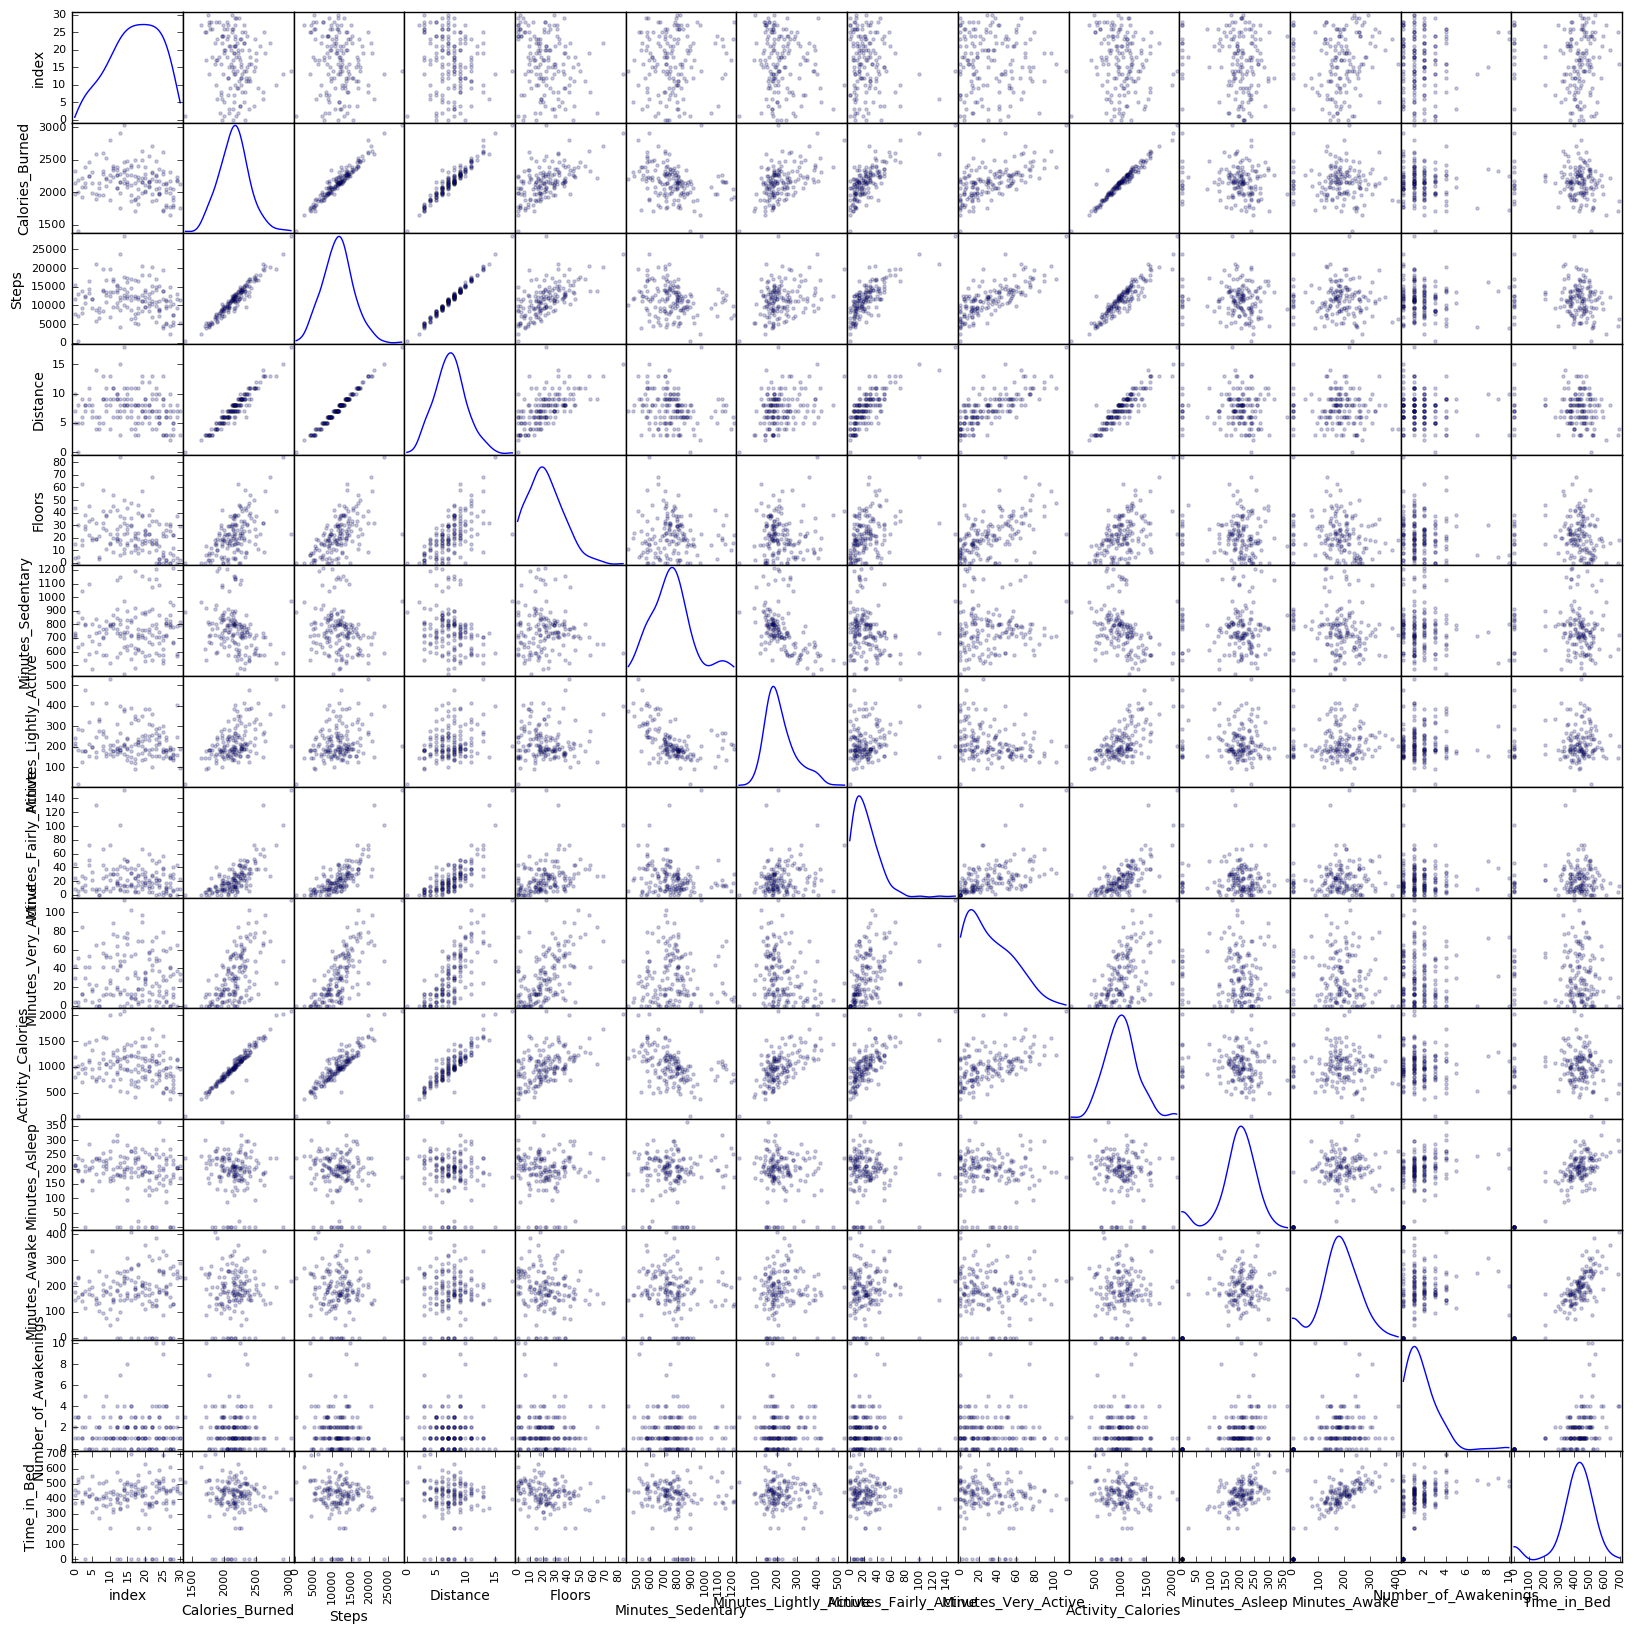

In [28]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# Import the libraries needed
import sklearn.linear_model
import matplotlib.pyplot

# create scatter plot
pandas.scatter_matrix(steps_and_sleep, alpha=0.2, figsize=(20,20), diagonal='kde')

In [29]:
# Somehow, the correlation between Sleep and Steps does not appear to be strong.
# Need to check if there's any more garbage data e.g. rows where Step=0 or Sleep =0
steps_and_sleep=steps_and_sleep[steps_and_sleep.Minutes_Asleep !=0]
steps_and_sleep=steps_and_sleep[steps_and_sleep.Steps !=0]
steps_and_sleep

index     Date_x  Calories_Burned  Steps  Distance  Floors  \
0       12 2016-09-13             2058  10579         7      19   
1       13 2016-09-14             2152  12212         8      37   
2       14 2016-09-15             2464  17521        11      50   
3       15 2016-09-16             2354  16307        10      30   
4       16 2016-09-17             1868   6270         4      18   
5       17 2016-09-18             1873   7673         5      14   
6       18 2016-09-19             1920   7869         5      24   
7       19 2016-09-20             2490  18283        12      37   
8       20 2016-09-21             2013   9483         6      23   
9       21 2016-09-22             2078   9807         6      23   
11      23 2016-09-24             2172  11030         7      18   
12      24 2016-09-25             2165  11054         7       3   
13      25 2016-09-26             2119  11804         8      21   
14      26 2016-09-27             2125  11229         7      31   
15      27 2016-09-28             2306  15029        10      25   
16      28 2016-09-29             1804   5551         4      12   
17       0 2016-01-10             1968   7818         5      15   
18       1 2016-02-10             1995   7211         5       5   
19       2 2016-03-10             2217  13989         9      63   
20       3 2016-04-10             2144  12166         8      27   
21       4 2016-05-10             2244  14426         9      22   
22       5 2016-06-10             2147  11790         8      35   
23       6 2016-07-10             2595  21097        14      32   
24       7 2016-08-10             2065   8243         5       3   
25       8 2016-09-10             2328  13912         9      58   
26       9 2016-10-10             2216  13498         9      38   
27      10 2016-11-10             2174  12622         8      23   
28      11 2016-12-10             2226  13709         9      20   
29      12 2016-10-13             2270  14169         9      27   
30      13 2016-10-14             2275  14539         9      29   
..     ...        ...              ...    ...       ...     ...   
112     13 2017-01-14             1761   4137         3       6   
113     14 2017-01-15             2197  10238         7      11   
114     15 2017-01-16             2263  13684         9      44   
115     16 2017-01-17             2388  16987        11      48   
116     17 2017-01-18             1716   5372         3      13   
117     18 2017-01-19             2045   9182         6      12   
118     19 2017-01-20             1994   8578         5      17   
119     20 2017-01-21             2392  13630         9      25   
120     21 2017-01-22             2161   8488         5       9   
122     23 2017-01-24             2042   9968         6      16   
123     24 2017-01-25             1976   8973         6      13   
124     25 2017-01-26             1729   4024         3       6   
125     26 2017-01-27             2001   9315         6      21   
126     27 2017-01-28             1765   4419         3       8   
127     28 2017-01-29             1883   7427         5       6   
128     29 2017-01-30             2186  13108         8      37   
129     30 2017-01-31             2131  11464         7      29   
130     12 2017-02-13             2340  15479        10      42   
131     13 2017-02-14             1984   8808         6      18   
132     14 2017-02-15             2144  12009         8      36   
133     15 2017-02-16             2153  12057         8      24   
135     17 2017-02-18             1896   6542         4      10   
137     19 2017-02-20             2152  12775         8      38   
138     20 2017-02-21             2000   9646         6      26   
139     21 2017-02-22             2174  13026         8      38   
140     22 2017-02-23             1976  10417         7      42   
141     23 2017-02-24             2249  14895        10       0   
142     24 2017-02-25             1981   8578       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017459E10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002AD3CAC8>]], dtype=object)

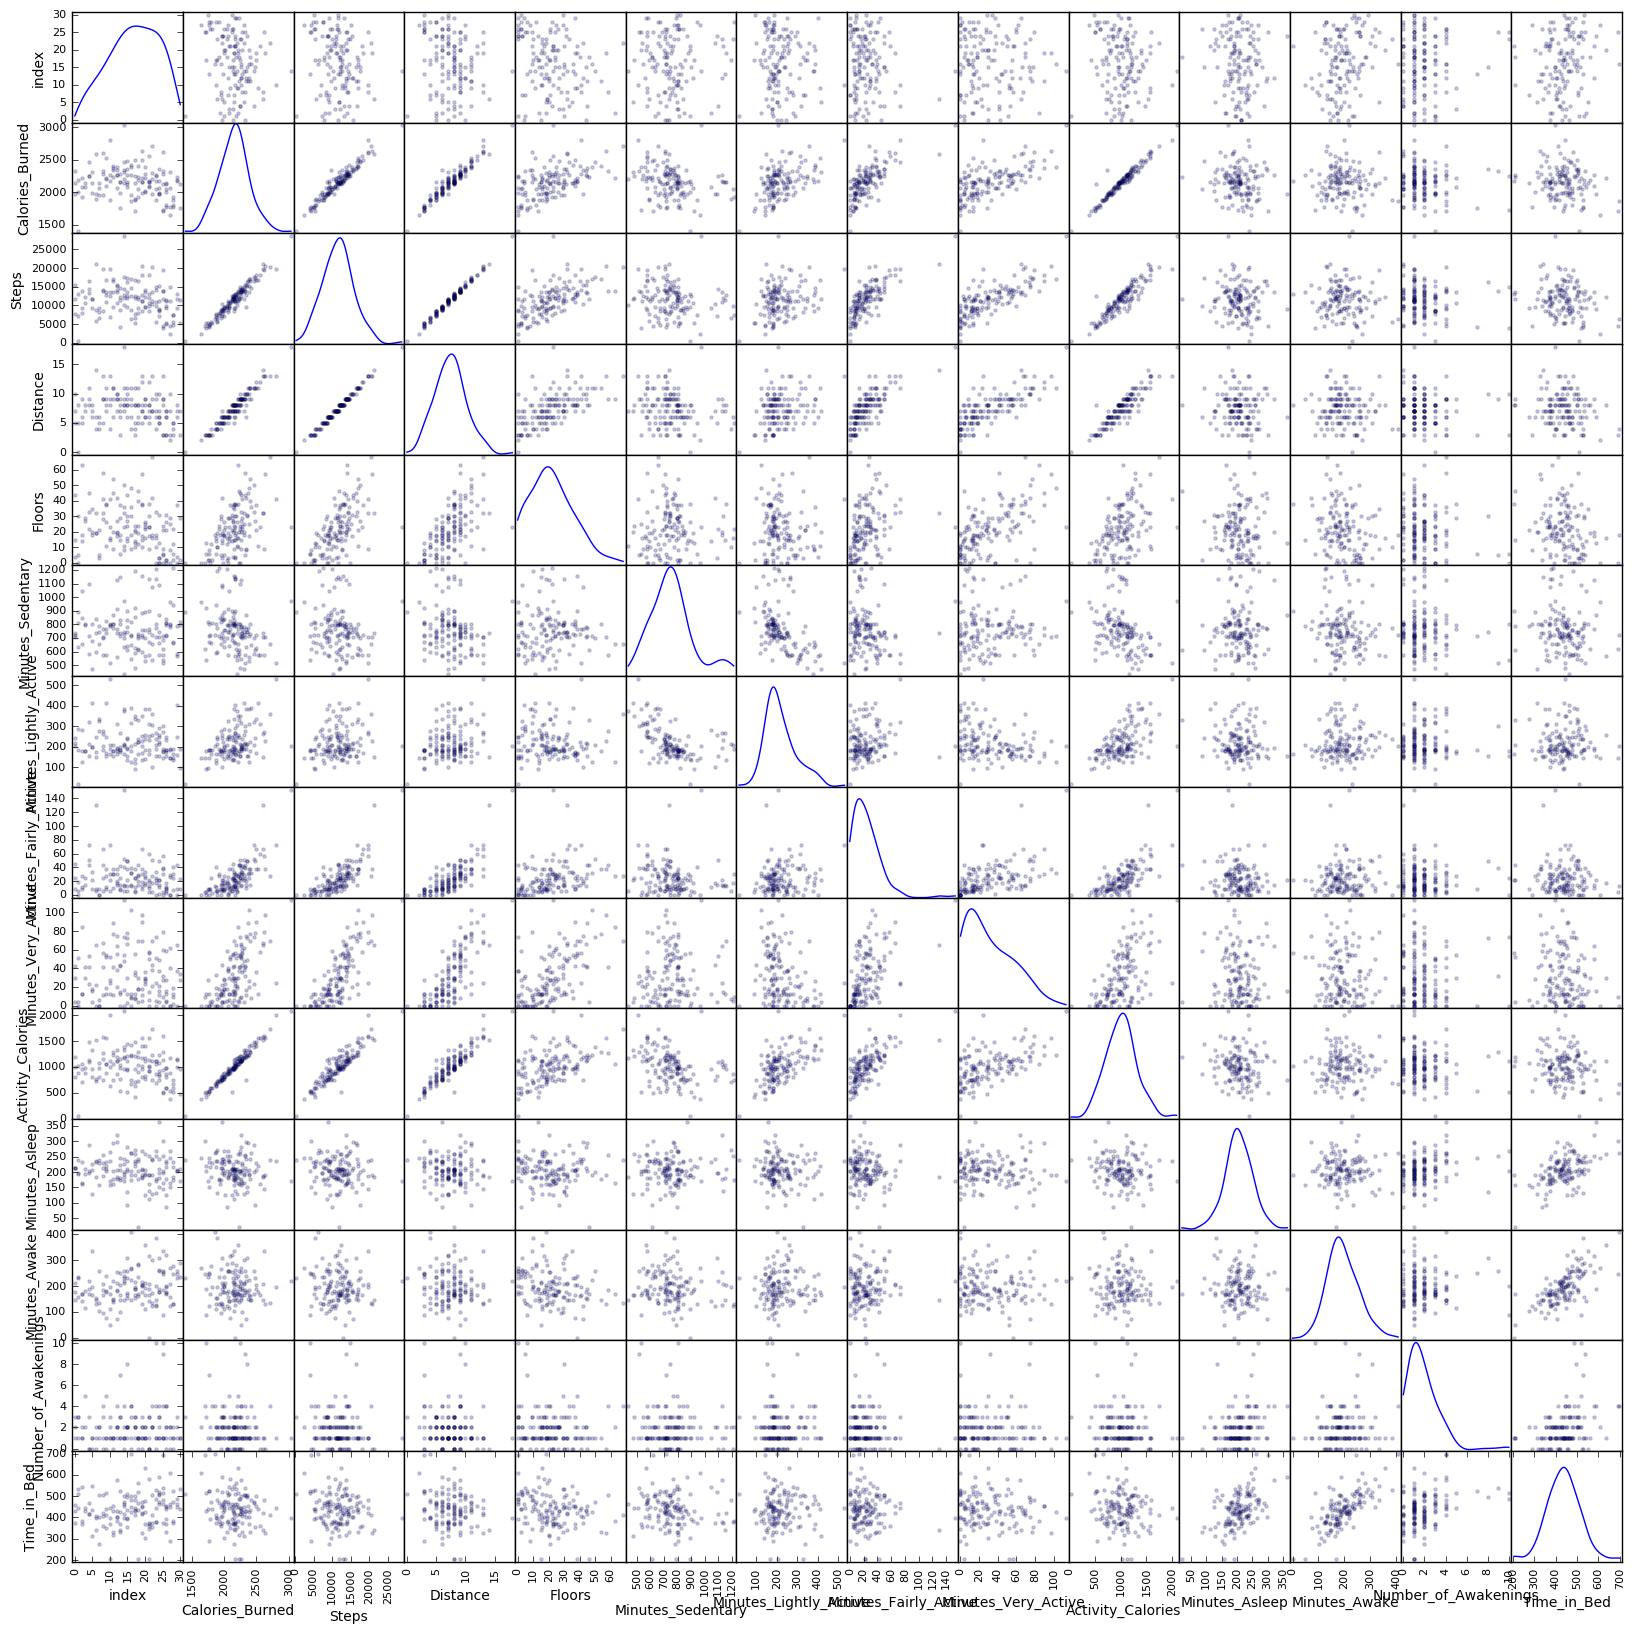

In [30]:
# Replot the refined dataframe and check if removing the garbage rows will show some correlation this time.
%matplotlib inline

# Import the libraries needed
import sklearn.linear_model
import matplotlib.pyplot

# create scatter plot
pandas.scatter_matrix(steps_and_sleep, alpha=0.2, figsize=(20,20), diagonal='kde')

In [31]:
# Still no strong correlation is visible -> so if we limit the model to Mon-Fri only
steps_and_sleep.Date_x.dt.dayofweek

#Where dayofweek:
#0: Mon
#1: Tue
#2: Wed
#3: Thu
#4: Fri
    
# Which means we need to exclude rows where dayofweek is 5 or 6.

0      1
1      2
2      3
3      4
4      5
5      6
6      0
7      1
8      2
9      3
11     5
12     6
13     0
14     1
15     2
16     3
17     6
18     2
19     3
20     6
21     1
22     4
23     6
24     2
25     5
26     0
27     3
28     5
29     3
30     4
      ..
112    5
113    6
114    0
115    1
116    2
117    3
118    4
119    5
120    6
122    1
123    2
124    3
125    4
126    5
127    6
128    0
129    1
130    0
131    1
132    2
133    3
135    5
137    0
138    1
139    2
140    3
141    4
142    5
143    6
144    0
Name: Date_x, dtype: int64

In [32]:
# Removing Sat and Sun data
steps_and_sleep= steps_and_sleep[steps_and_sleep.Date_x.dt.dayofweek < 5]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000030E57358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003C6FED30>]], dtype=object)

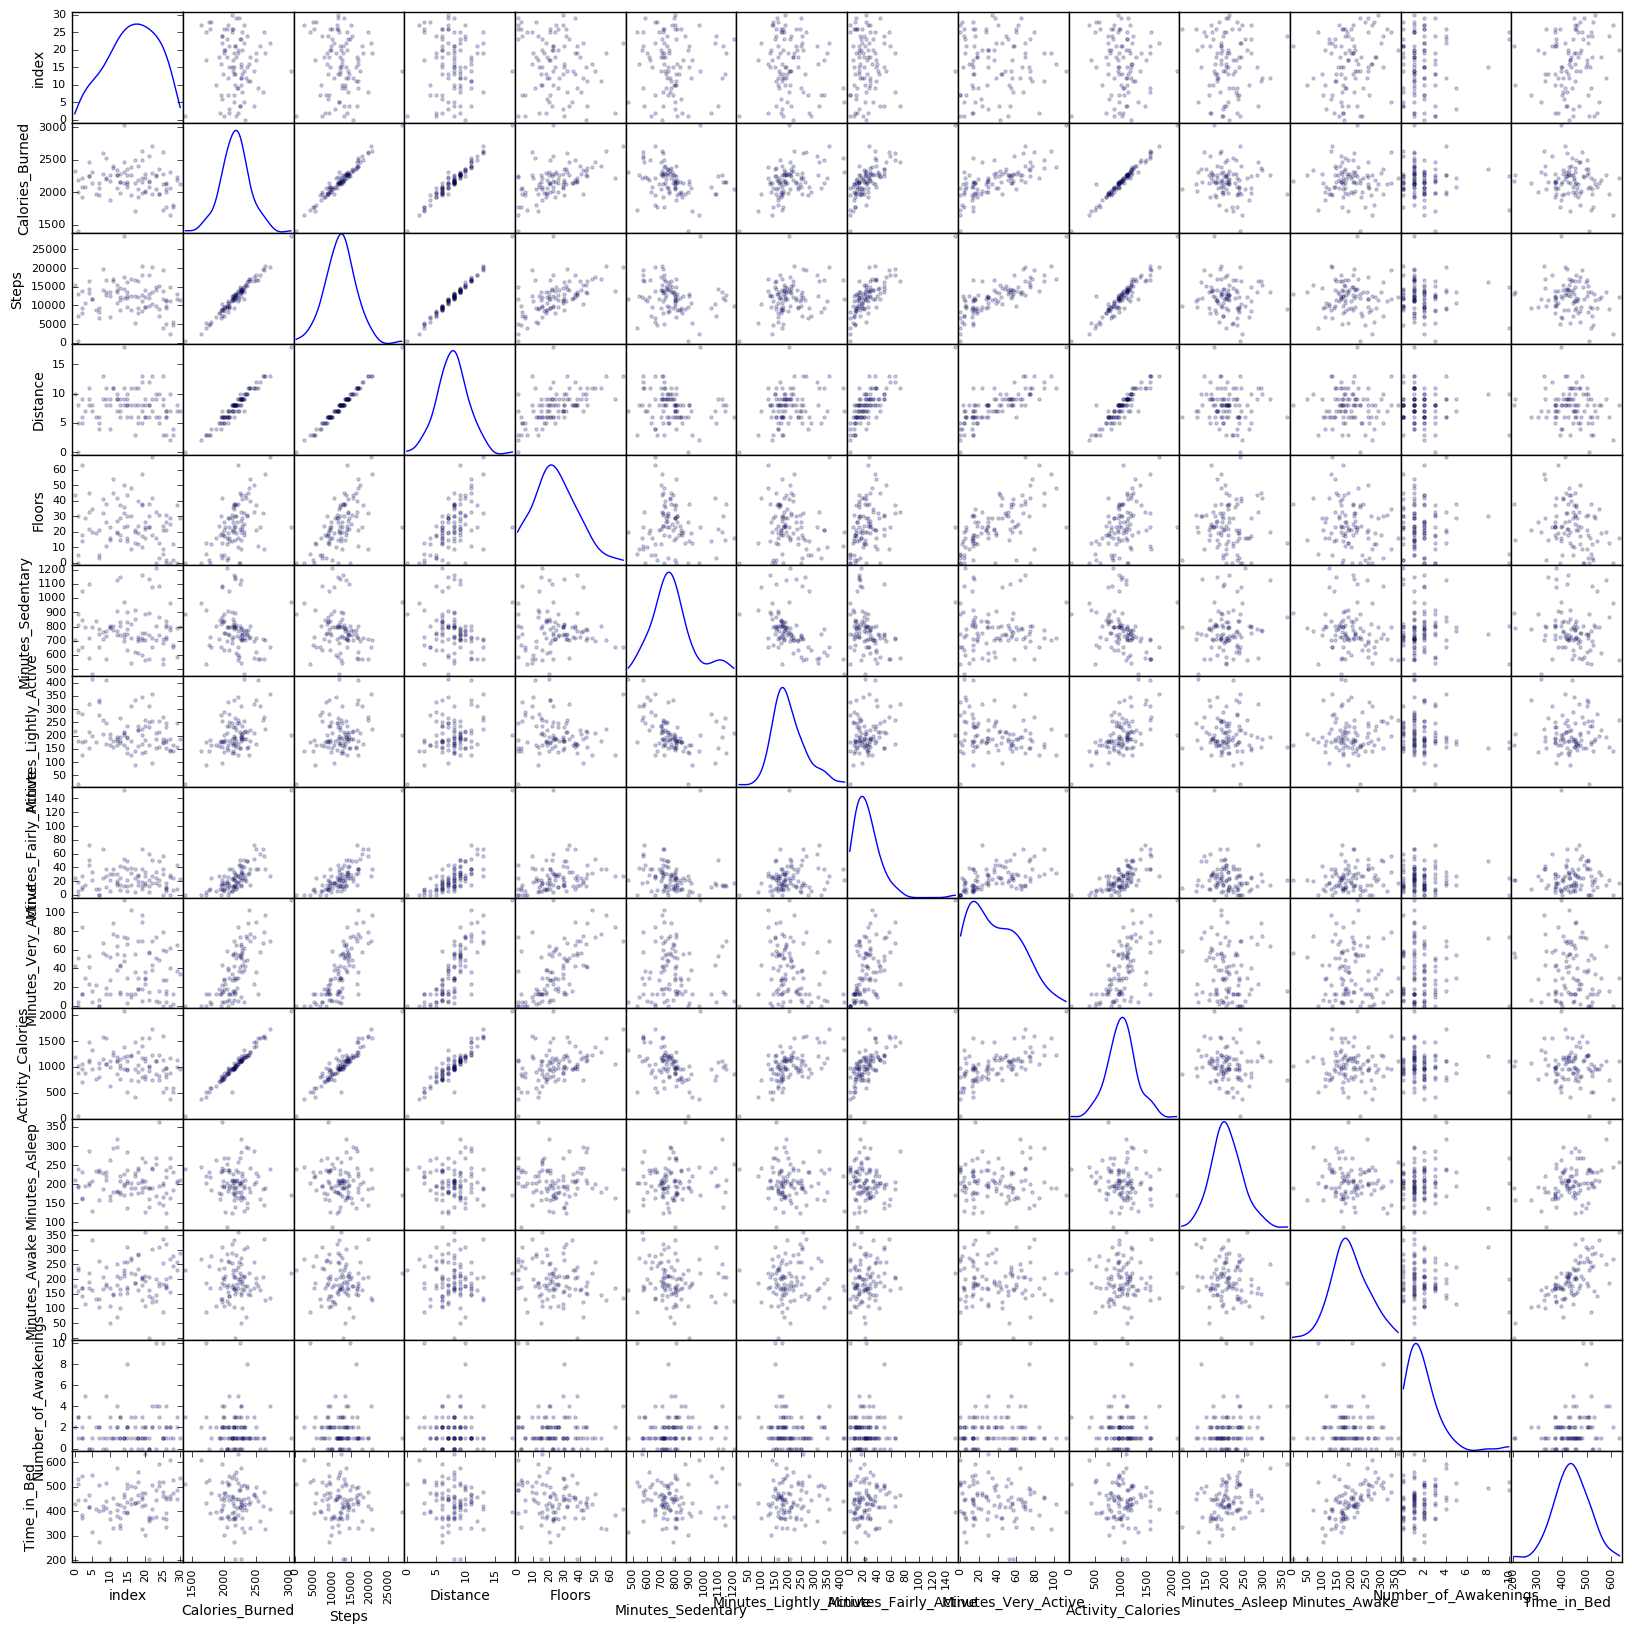

In [33]:
# Replot the refined dataframe to show a stronger correlation
%matplotlib inline

# Import the libraries needed
import sklearn.linear_model
import matplotlib.pyplot

# create scatter plot
pandas.scatter_matrix(steps_and_sleep, alpha=0.2, figsize=(20,20), diagonal='kde')

In [34]:
steps_and_sleep

index     Date_x  Calories_Burned  Steps  Distance  Floors  \
0       12 2016-09-13             2058  10579         7      19   
1       13 2016-09-14             2152  12212         8      37   
2       14 2016-09-15             2464  17521        11      50   
3       15 2016-09-16             2354  16307        10      30   
6       18 2016-09-19             1920   7869         5      24   
7       19 2016-09-20             2490  18283        12      37   
8       20 2016-09-21             2013   9483         6      23   
9       21 2016-09-22             2078   9807         6      23   
13      25 2016-09-26             2119  11804         8      21   
14      26 2016-09-27             2125  11229         7      31   
15      27 2016-09-28             2306  15029        10      25   
16      28 2016-09-29             1804   5551         4      12   
18       1 2016-02-10             1995   7211         5       5   
19       2 2016-03-10             2217  13989         9      63   
21       4 2016-05-10             2244  14426         9      22   
22       5 2016-06-10             2147  11790         8      35   
24       7 2016-08-10             2065   8243         5       3   
26       9 2016-10-10             2216  13498         9      38   
27      10 2016-11-10             2174  12622         8      23   
29      12 2016-10-13             2270  14169         9      27   
30      13 2016-10-14             2275  14539         9      29   
33      16 2016-10-17             1958   8728         6      30   
34      17 2016-10-18             2144  12585         8      20   
35      18 2016-10-19             2181  12145         8      19   
36      19 2016-10-20             2216  11156         7      10   
37      20 2016-10-21             2282  14106         9      22   
40      23 2016-10-24             2263  14122         9      33   
41      24 2016-10-25             2351  15277        10      31   
42      25 2016-10-26             2274  13921         9      24   
43      26 2016-10-27             2136  11489         7      26   
..     ...        ...              ...    ...       ...     ...   
100      1 2017-02-01             1405    348         0       0   
101      2 2017-03-01             2074   9217         6      14   
103      4 2017-05-01             2470  16616        11      33   
104      5 2017-06-01             2311  11702         7      20   
106      7 2017-08-01             2147   9277         6      21   
107      8 2017-09-01             2285  14220         9      41   
109     10 2017-11-01             1878   6974         4      16   
110     11 2017-12-01             2371  16491        11      45   
111     12 2017-01-13             2259  13695         9      20   
114     15 2017-01-16             2263  13684         9      44   
115     16 2017-01-17             2388  16987        11      48   
116     17 2017-01-18             1716   5372         3      13   
117     18 2017-01-19             2045   9182         6      12   
118     19 2017-01-20             1994   8578         5      17   
122     23 2017-01-24             2042   9968         6      16   
123     24 2017-01-25             1976   8973         6      13   
124     25 2017-01-26             1729   4024         3       6   
125     26 2017-01-27             2001   9315         6      21   
128     29 2017-01-30             2186  13108         8      37   
129     30 2017-01-31             2131  11464         7      29   
130     12 2017-02-13             2340  15479        10      42   
131     13 2017-02-14             1984   8808         6      18   
132     14 2017-02-15             2144  12009         8      36   
133     15 2017-02-16             2153  12057         8      24   
137     19 2017-02-20             2152  12775         8      38   
138     20 2017-02-21             2000   9646         6      26   
139     21 2017-02-22             2174  13026         8      38   
140     22 2017-02-23             1976  10417       

# Assignment Part 6: If you can find any good candidates for a regression, try some regressors out.

In [35]:
# One last clean-up attempt. Remove data where Step < 5000. 
steps_and_sleep=steps_and_sleep[steps_and_sleep.Steps > 5000]
steps_and_sleep

index     Date_x  Calories_Burned  Steps  Distance  Floors  \
0       12 2016-09-13             2058  10579         7      19   
1       13 2016-09-14             2152  12212         8      37   
2       14 2016-09-15             2464  17521        11      50   
3       15 2016-09-16             2354  16307        10      30   
6       18 2016-09-19             1920   7869         5      24   
7       19 2016-09-20             2490  18283        12      37   
8       20 2016-09-21             2013   9483         6      23   
9       21 2016-09-22             2078   9807         6      23   
13      25 2016-09-26             2119  11804         8      21   
14      26 2016-09-27             2125  11229         7      31   
15      27 2016-09-28             2306  15029        10      25   
16      28 2016-09-29             1804   5551         4      12   
18       1 2016-02-10             1995   7211         5       5   
19       2 2016-03-10             2217  13989         9      63   
21       4 2016-05-10             2244  14426         9      22   
22       5 2016-06-10             2147  11790         8      35   
24       7 2016-08-10             2065   8243         5       3   
26       9 2016-10-10             2216  13498         9      38   
27      10 2016-11-10             2174  12622         8      23   
29      12 2016-10-13             2270  14169         9      27   
30      13 2016-10-14             2275  14539         9      29   
33      16 2016-10-17             1958   8728         6      30   
34      17 2016-10-18             2144  12585         8      20   
35      18 2016-10-19             2181  12145         8      19   
36      19 2016-10-20             2216  11156         7      10   
37      20 2016-10-21             2282  14106         9      22   
40      23 2016-10-24             2263  14122         9      33   
41      24 2016-10-25             2351  15277        10      31   
42      25 2016-10-26             2274  13921         9      24   
43      26 2016-10-27             2136  11489         7      26   
..     ...        ...              ...    ...       ...     ...   
94      26 2016-12-27             2049   9892         6       2   
97      29 2016-12-30             2227  11635         7       0   
101      2 2017-03-01             2074   9217         6      14   
103      4 2017-05-01             2470  16616        11      33   
104      5 2017-06-01             2311  11702         7      20   
106      7 2017-08-01             2147   9277         6      21   
107      8 2017-09-01             2285  14220         9      41   
109     10 2017-11-01             1878   6974         4      16   
110     11 2017-12-01             2371  16491        11      45   
111     12 2017-01-13             2259  13695         9      20   
114     15 2017-01-16             2263  13684         9      44   
115     16 2017-01-17             2388  16987        11      48   
116     17 2017-01-18             1716   5372         3      13   
117     18 2017-01-19             2045   9182         6      12   
118     19 2017-01-20             1994   8578         5      17   
122     23 2017-01-24             2042   9968         6      16   
123     24 2017-01-25             1976   8973         6      13   
125     26 2017-01-27             2001   9315         6      21   
128     29 2017-01-30             2186  13108         8      37   
129     30 2017-01-31             2131  11464         7      29   
130     12 2017-02-13             2340  15479        10      42   
131     13 2017-02-14             1984   8808         6      18   
132     14 2017-02-15             2144  12009         8      36   
133     15 2017-02-16             2153  12057         8      24   
137     19 2017-02-20             2152  12775         8      38   
138     20 2017-02-21             2000   9646         6      26   
139     21 2017-02-22             2174  13026         8      38   
140     22 2017-02-23             1976  10417       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000042AA2470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000004E0B3A20>]], dtype=object)

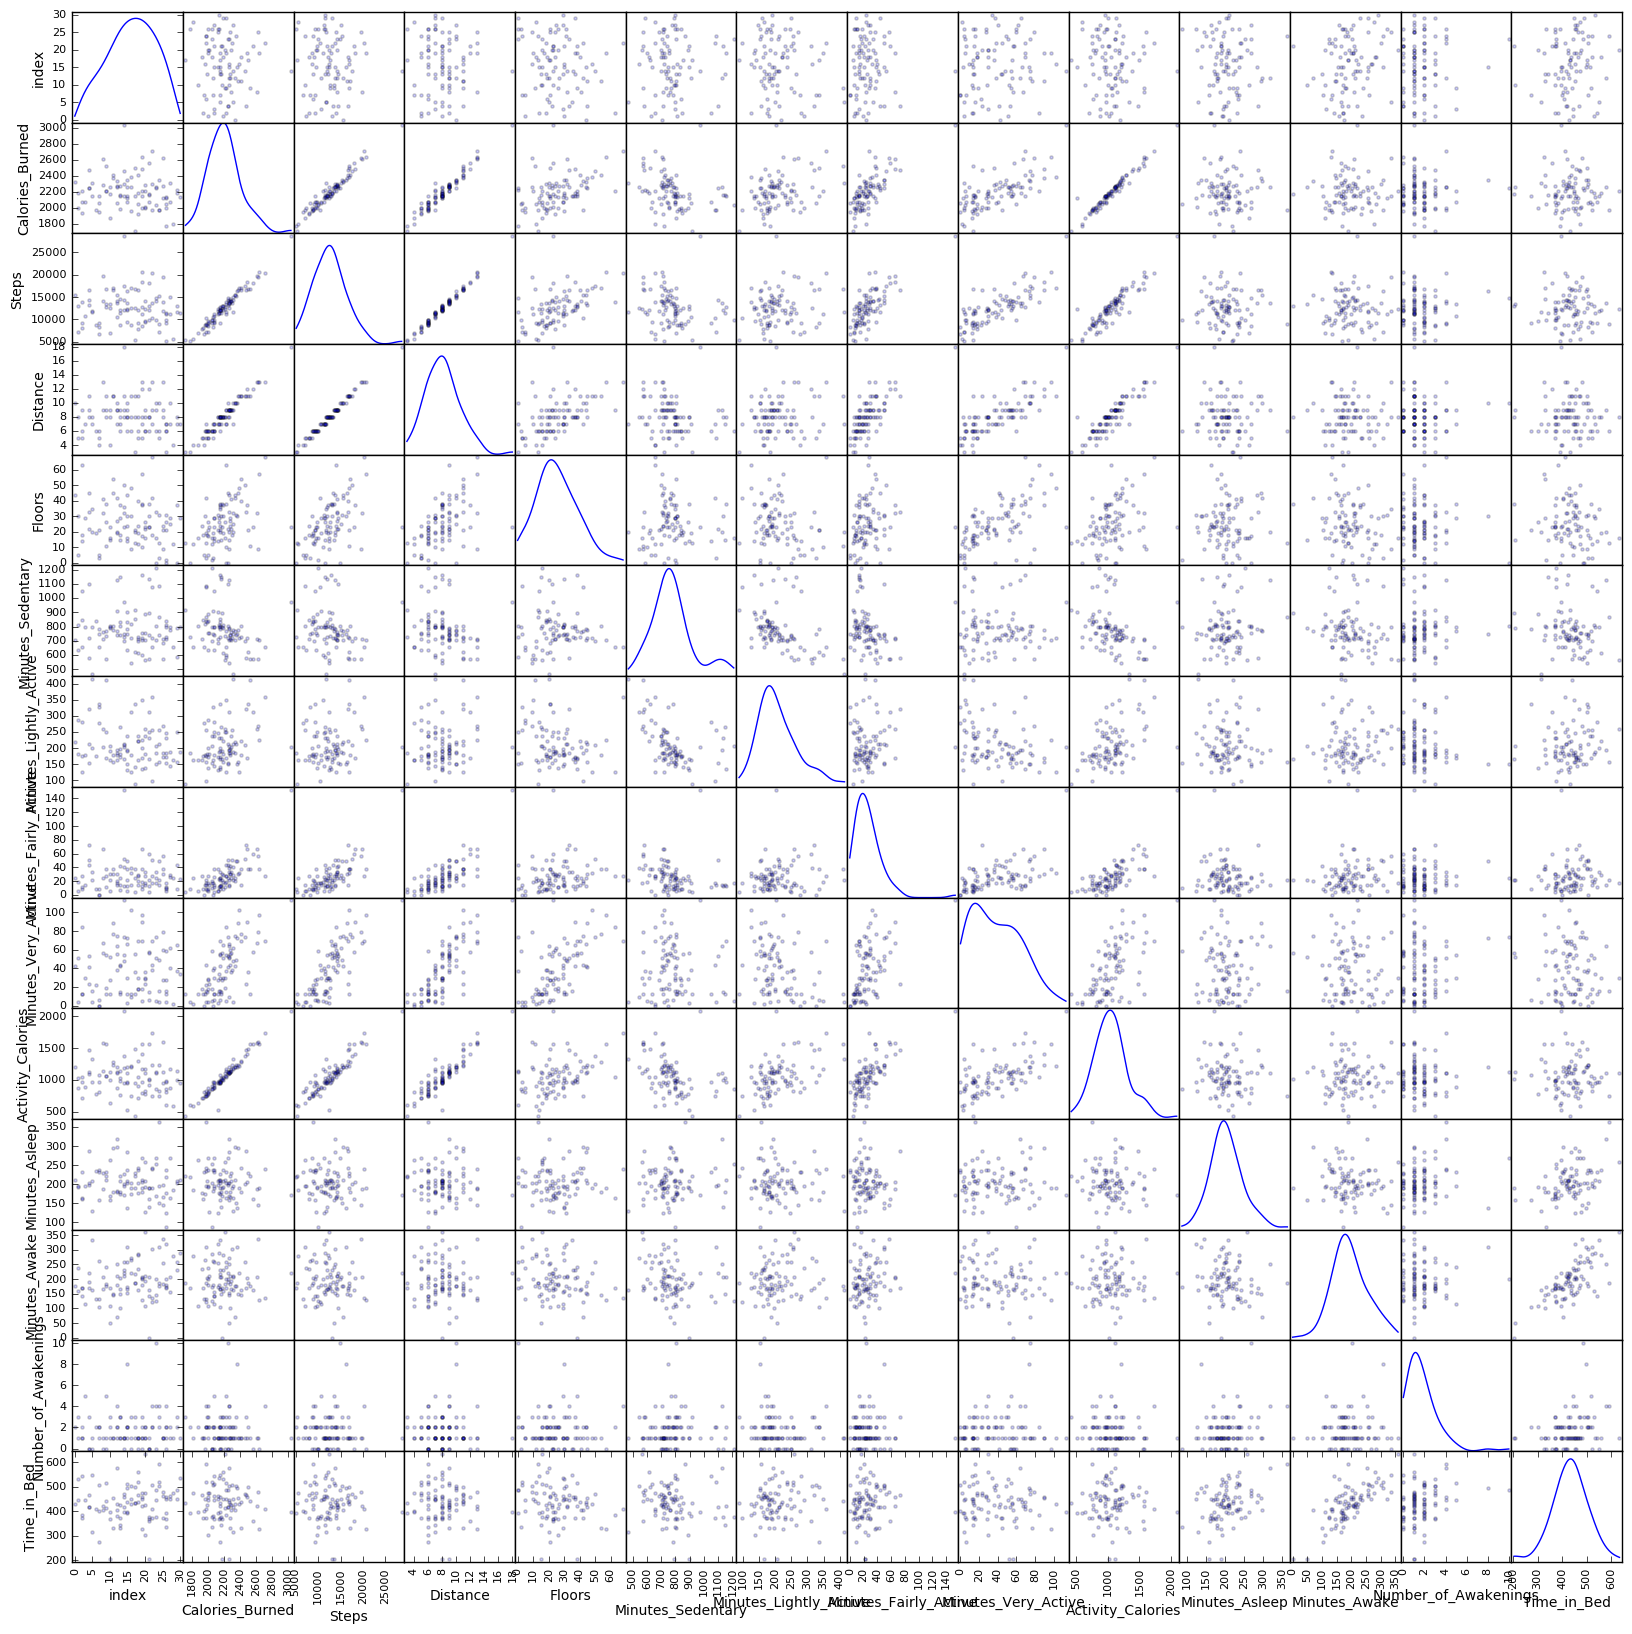

In [36]:
# Replot the refined dataframe to show a stronger correlation
%matplotlib inline

# Import the libraries needed
import sklearn.linear_model
import matplotlib.pyplot

# create scatter plot
pandas.scatter_matrix(steps_and_sleep, alpha=0.2, figsize=(20,20), diagonal='kde')

In [37]:
# Look for any linear correlations in the data - the bigger the number the better. 

# Test One: Ordinary Least Squares Regression
import sklearn.linear_model
ols_fitbit=sklearn.linear_model.LinearRegression()

In [38]:
X = steps_and_sleep[['Steps','Floors']]
y = steps_and_sleep.Minutes_Asleep

In [39]:
ols_fitbit.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
ols_fitbit.coef_

array([-0.00122668,  0.2595533 ])

In [41]:
ols_fitbit.intercept_

213.96963995849654

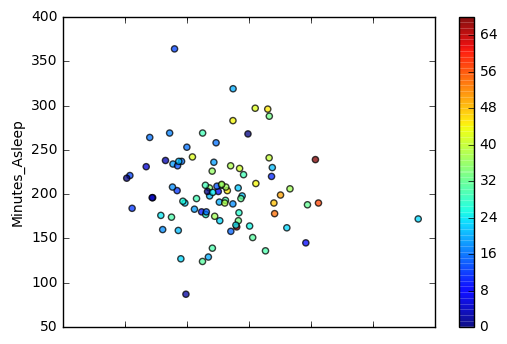

In [42]:
# So OLS Regression Model gave this equation:
# Minutes_Asleep= 214 - 0.00123 * Steps +0.25955 * Floors
import matplotlib.pyplot
steps_and_sleep.plot.scatter('Steps','Minutes_Asleep'
                                 , c=steps_and_sleep.Floors, alpha=0.75
                                 , colormap=matplotlib.pyplot.cm.jet)
set_xlabel="Steps"
set_ylabel="Minutes_Asleep"

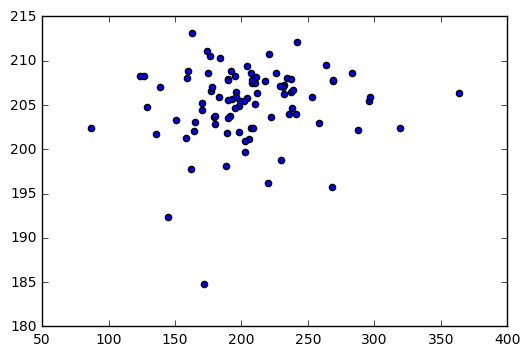

In [43]:
# Get the OLS Predicted values across all X inputs
ols_predictions= ols_fitbit.predict(X)

# Make a scatter matrix. Compare the ols_predicted "Minutes_Asleep" with the real values of "y=Minutes_Asleep"
matplotlib.pyplot.scatter(y, ols_predictions)

In [44]:
# Test Two: Theil Sen Regression
!pip install sklearn
import sklearn.linear_model

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:
ts_fitbit=sklearn.linear_model.TheilSenRegressor()

In [46]:
X = steps_and_sleep[['Steps','Floors']]
y = steps_and_sleep.Minutes_Asleep
ts_fitbit.fit(X,y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [47]:
ts_fitbit.coef_

array([-0.00066585, -0.22491677])

In [48]:
ts_fitbit.intercept_

215.08592526505453

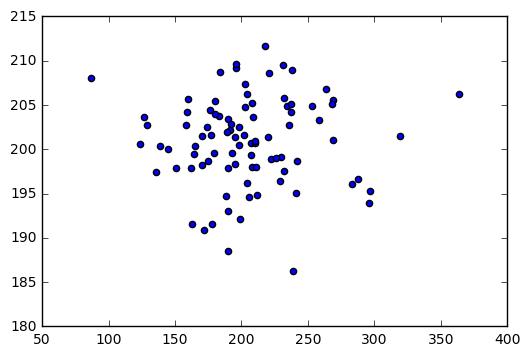

In [49]:
# So Theil Sen Regression Model gave this equation:
# Minutes_Asleep= 212 - 0.00039549 * Steps -0.21602 * Floors

# Get the Theil Sen Predicted values across all X inputs
ts_predictions= ts_fitbit.predict(X)

# Make a scatter matrix. Compare the ols_predicted "Minutes_Asleep" with the real values of "y=Minutes_Asleep"
import matplotlib.pyplot
matplotlib.pyplot.scatter(y, ts_predictions)